# Distribution statics for claims and evidence

In [1]:
# Change the working directory to project root
import pathlib
import os
ROOT_DIR = pathlib.Path.cwd().parent
os.chdir(ROOT_DIR)

In [2]:
# Dependencies
import json
import re
import pandas as pd
from pandas import DataFrame

from src.data import load_from_json, load_as_dataframe

## Load the datasets

In [3]:
all_datasets = \
    ["train-claims", "dev-claims", "test-claims-unlabelled", "evidence"]
working_datasets = ["train-claims", "dev-claims", "evidence"]
train_claims_raw, dev_claims_raw, test_claims_raw, evidence_raw = \
    load_from_json(all_datasets)
train_claims, dev_claims = \
    load_as_dataframe(working_datasets)

Loaded train-claims
Loaded dev-claims
Loaded test-claims-unlabelled
Loaded evidence
Loaded train-claims
Loaded dev-claims
Loaded evidence


## Size of datasets

In [4]:
print(f"Size of train-claims: {len(train_claims_raw.keys())}")
print(f"Size of dev-claims: {len(dev_claims_raw.keys())}")
print(f"Size of test-claims: {len(test_claims_raw.keys())}")
print(f"Size of evidence: {len(evidence_raw.keys())}")

Size of train-claims: 1228
Size of dev-claims: 154
Size of test-claims: 153
Size of evidence: 1208827


## Class distribution

In [5]:
DataFrame.from_dict(train_claims_raw, orient="index") \
    .groupby("claim_label").size()

claim_label
DISPUTED           124
NOT_ENOUGH_INFO    386
REFUTES            199
SUPPORTS           519
dtype: int64

In [6]:
DataFrame.from_dict(dev_claims_raw, orient="index") \
    .groupby("claim_label").size()

claim_label
DISPUTED           18
NOT_ENOUGH_INFO    41
REFUTES            27
SUPPORTS           68
dtype: int64

## Number of evidence per claim

<Axes: >

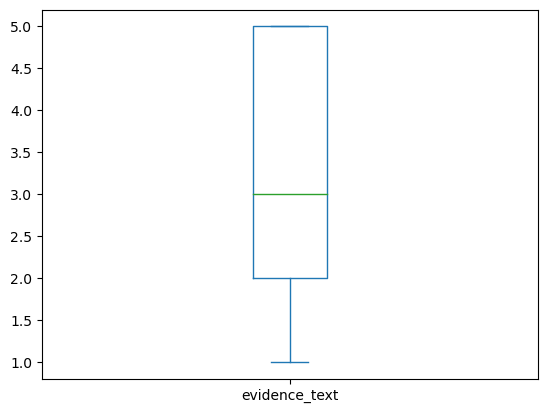

In [7]:
train_claims.groupby("claim").count().plot(kind="box")

<Axes: >

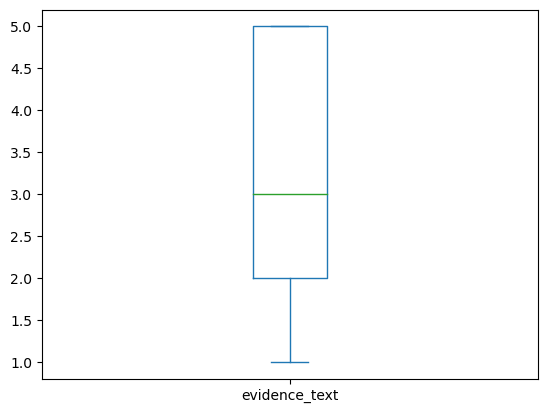

In [8]:
dev_claims.groupby("claim").count().plot(kind="box")

## Usage of evidence

In [12]:
pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 10000)

In [9]:
all_evidence = DataFrame.from_dict(
    data=evidence_raw, orient="index", columns=["evidence_text"]
)
evidence_used = (
    train_claims.index.get_level_values("evidences")
    .value_counts()
    .to_frame()
)
evidence_used = pd.merge(
    left = evidence_used,
    right = all_evidence,
    left_index=True, right_index=True
)
evidence_used

,count,evidence_text
evidence-742898,39,"In the scientific literature, there is an over..."
evidence-368192,19,Increases in atmospheric concentrations of CO ...
evidence-1120350,18,"Currently, surface temperatures are rising by ..."
evidence-88825,13,Surface temperature increases are greatest in ...
evidence-814790,13,Since the Industrial Revolution anthropogenic ...
...,...,...
evidence-1157800,1,Studying the association between Earth climate...
evidence-473200,1,"Researchers expect that over time, climate cha..."
evidence-376558,1,Australia has some of the world's most diverse...
evidence-1039181,1,"""Ecosystems and species are vulnerable to clim..."


<Axes: >

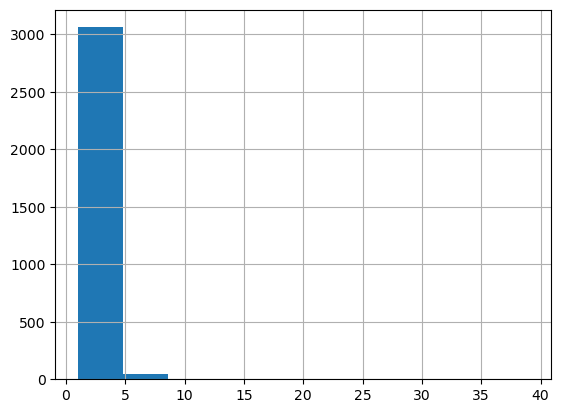

In [16]:
evidence_used["count"].hist()

### Most cited evidences

In [18]:
most_cited_evidence = evidence_used[evidence_used["count"] >= 5]
most_cited_evidence

,count,evidence_text
evidence-742898,39,"In the scientific literature, there is an overwhelming consensus that global surface temperatures have increased in recent decades and that the trend is caused mainly by human-induced emissions of greenhouse gases."
evidence-368192,19,"Increases in atmospheric concentrations of CO 2 and other long-lived greenhouse gases such as methane, nitrous oxide and ozone have correspondingly strengthened their absorption and emission of infrared radiation, causing the rise in average global temperature since the mid-20th century."
evidence-1120350,18,"Currently, surface temperatures are rising by about 0.2 °C per decade."
evidence-88825,13,"Surface temperature increases are greatest in the Arctic, which has contributed to the retreat of glaciers, permafrost, and sea ice."
evidence-814790,13,"Since the Industrial Revolution anthropogenic emissions – primarily from use of fossil fuels and deforestation – have rapidly increased its concentration in the atmosphere, leading to global warming."
evidence-946255,12,"Between 1993 and 2017, the global mean sea level rose on average by 3.1 ± 0.3 mm per year, with an acceleration detected as well."
evidence-1127398,11,"This acceleration is due mostly to human-caused global warming, which is driving thermal expansion of seawater and the melting of land-based ice sheets and glaciers."
evidence-28478,10,"Climate model projections summarized in the report indicated that during the 21st century the global surface temperature is likely to rise a further 0.3 to 1.7 °C (0.5 to 3.1 °F) in a moderate scenario, or as much as 2.6 to 4.8 °C (4.7 to 8.6 °F) in an extreme scenario, depending on the rate of future greenhouse gas emissions and on climate feedback effects."
evidence-817308,10,"The effects of global warming in the Arctic, or climate change in the Arctic include rising air and water temperatures, loss of sea ice, and melting of the Greenland ice sheet with a related cold temperature anomaly, observed since the 1970s."
evidence-510852,9,Human-caused increases in greenhouse gases are responsible for most of the observed global average surface warming of roughly 0.8 °C (1.5 °F) over the past 140 years.


### Least cited evidence

In [19]:
least_cited_evidences = evidence_used[evidence_used["count"] < 2]
least_cited_evidences.tail(20)

,count,evidence_text
evidence-506409,1,"Climate change adaptation (CCA) is a response to global warming (also known as ""climate change"" or ""anthropogenic climate change"")."
evidence-1113083,1,"""NASA, NOAA Analyses Reveal Record-Shattering Global Warm Temperatures in 2015""."
evidence-1114252,1,"Climate sensitivity is typically estimated in three ways; by using observations taken during the industrial age, by using temperature and other data from the Earth's past and by modelling the climate system in computers."
evidence-243995,1,"Strong westerly (eastward) winds blow around Antarctica, driving a significant flow of water northwards."
evidence-475144,1,The New York Times and others reported in 2015 that oil companies knew that burning oil and gas could cause climate change and global warming since the 1970s but nonetheless funded deniers for years.
evidence-128686,1,To cut carbon emissions by 25% below 2000 levels by 2020 if the world agrees to an ambitious global deal to stabilise levels of CO2e to 450 ppm or lower.
evidence-430393,1,"To limit global temperature rise to 1.5 °C, the global annual emission reduction needed is 7.6% emissions reduction every year between 2020 and 2030."
evidence-684895,1,Climate sensitivity is an emergent property of these models.
evidence-1053391,1,The cause of the increased sensitivity lies mainly in improved modelling of clouds so that low clouds descrease more strongly when temperature rise causing enhanced planetary absorption of sunlight.
evidence-722761,1,"Thus, a small change in the mean temperature of the ocean represents a very large change in the total heat content of the climate system."


### Evidence not used

In [11]:
with pd.option_context(
    "display.max_colwidth", 0,
    "display.max_rows", 10000
):
    not_used = (
        all_evidence.drop(evidence_used.index)
    )
    display(not_used.head(20))

,evidence_text
evidence-0,"John Bennet Lawes, English entrepreneur and agricultural scientist"
evidence-1,"Lindberg began his professional career at the age of 16, eventually moving to New York City in 1977."
evidence-2,``Boston (Ladies of Cambridge)'' by Vampire Weekend
evidence-3,"Gerald Francis Goyer (born October 20, 1936) was a professional ice hockey player who played 40 games in the National Hockey League."
evidence-4,"He detected abnormalities of oxytocinergic function in schizoaffective mania, post-partum psychosis and how ECT modified oxytocin release."
evidence-5,"With peak winds of 110 mph (175 km/h) and a minimum pressure of 972 mbar (hPa ; 28.71 inHg), Florence was the strongest storm of the 1994 Atlantic hurricane season."
evidence-6,He is currently a professor of piano at the University of Wisconsin -- Madison since August 2000.
evidence-7,"In addition to known and tangible risks, unforeseeable black swan extinction events may occur, presenting an additional methodological problem."
evidence-8,Sir John Sherbrooke was able to hold her off for some five hours until Robson suffered a severe wound that almost killed him.
evidence-9,"Aslan Tlebzu (Аслъан ЛIыбзэу [- adyaːsɬaːn ɬʼəbzaw], Russian : Аслан Тлебзу), born 24 February 1981, Teuchezhsk, Adygea, USSR ; is a Russian Adyghe folk musician."
